In [1]:
library(phyloseq)
library(wesanderson)
library(ggplot2)
library(vegan)
library(dplyr)

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
ps.hell=readRDS("../data/Cornell16S/ps.16S.hell")
ps.hell

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14870 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 14870 taxa by 7 taxonomic ranks ]

In [3]:
d = as.matrix(otu_table(ps.hell))
dist = as.matrix(vegdist(d, method="bray"))
dim(dist)
# Creates sample matrix

[1] 174 174

In [4]:
samdat = data.frame(sample_data(ps.hell))
samdat$Sample = row.names(samdat)

# Fix soil ID day name
samdat = samdat%>%
    arrange(Soil_Trtmt,Amdmt,Soil_Rep_Day)%>%
    mutate(Soil_Rep_Day.2 = paste(Soil_Rep,"_",Day,sep=""))

In [5]:
# Randomly assign sub-divisions to NY soils (from same original soil sample)
t = samdat %>%
    filter(Soil_Trtmt == "New York")%>%
    arrange(Soil_Rep_Day.2,Amdmt)
t$Soil_Rep_Day.2 = paste(t$Soil_Rep_Day.2,c("a","a","a",rep(c("a","b","c","d"),6)),sep="")

samdat = samdat %>%
    arrange(Soil_Rep_Day.2,Amdmt)

samdat[samdat$Soil_Trtmt == "New York",] = t

In [6]:
samdat$Soil_Rep_Day.2

[1] "AK_A_1"   "AK_A_1"   "AK_A_1"   "AK_A_10"  "AK_A_10"  "AK_A_10" 
  [7] "AK_A_26"  "AK_A_26"  "AK_A_26"  "AK_B_1"   "AK_B_1"   "AK_B_1"  
 [13] "AK_B_10"  "AK_B_10"  "AK_B_10"  "AK_B_26"  "AK_B_26"  "AK_B_26" 
 [19] "AK_C_1"   "AK_C_1"   "AK_C_1"   "AK_C_10"  "AK_C_10"  "AK_C_10" 
 [25] "AK_C_26"  "AK_C_26"  "AK_C_26"  "AK_D_1"   "AK_D_1"   "AK_D_1"  
 [31] "AK_D_10"  "AK_D_10"  "AK_D_10"  "AK_D_26"  "AK_D_26"  "AK_D_26" 
 [37] "FL_A_1"   "FL_A_1"   "FL_A_1"   "FL_A_10"  "FL_A_10"  "FL_A_10" 
 [43] "FL_A_26"  "FL_A_26"  "FL_A_26"  "FL_B_1"   "FL_B_1"   "FL_B_1"  
 [49] "FL_B_10"  "FL_B_10"  "FL_B_10"  "FL_B_26"  "FL_B_26"  "FL_B_26" 
 [55] "FL_C_1"   "FL_C_1"   "FL_C_1"   "FL_C_10"  "FL_C_10"  "FL_C_10" 
 [61] "FL_C_26"  "FL_C_26"  "FL_C_26"  "FL_D_1"   "FL_D_1"   "FL_D_1"  
 [67] "FL_D_10"  "FL_D_10"  "FL_D_10"  "HI_A_1"   "HI_A_1"   "HI_A_1"  
 [73] "HI_A_10"  "HI_A_10"  "HI_A_10"  "HI_A_26"  "HI_A_26"  "HI_A_26" 
 [79] "HI_B_1"   "HI_B_1"   "HI_B_1"   "HI_B_10"  "HI_B_10"  "HI_B_10" 
 [85] "HI_B_26"  "HI_B_26"  "HI_B_26"  "HI_C_1"   "HI_C_1"   "HI_C_1"  
 [91] "HI_C_10"  "HI_C_10"  "HI_C_10"  "HI_C_26"  "HI_C_26"  "HI_C_26" 
 [97] "HI_D_1"   "HI_D_1"   "HI_D_1"   "HI_D_10"  "HI_D_10"  "HI_D_10" 
[103] "HI_D_26"  "HI_D_26"  "HI_D_26"  "MP_A_1a"  "MP_A_1a"  "MP_A_1a" 
[109] "MP_A_1a"  "MP_A_1b"  "MP_A_1c"  "MP_A_1d"  "MP_A_1a"  "MP_A_1b" 
[115] "MP_A_1c"  "MP_A_1d"  "MP_A_1a"  "MP_A_10b" "MP_A_10c" "MP_A_10d"
[121] "MP_A_10a" "MP_A_10b" "MP_A_10c" "MP_A_10d" "MP_A_10a" "MP_A_10b"
[127] "MP_A_10c" "MP_A_10d" "MP_A_10a" "MP_A_26b" "MP_A_26c" "MP_A_26d"
[133] "MP_A_26a" "MP_A_26a" "MP_A_26a" "MP_A_26a" "MP_A_26b" "MP_A_26c"
[139] "MP_A_26d" "MP_A_26a" "MP_A_26b" "UT_A_1"   "UT_A_1"   "UT_A_1"  
[145] "UT_A_10"  "UT_A_10"  "UT_A_10"  "UT_A_26"  "UT_A_26"  "UT_A_26" 
[151] "UT_B_1"   "UT_B_1"   "UT_B_1"   "UT_B_10"  "UT_B_10"  "UT_B_10" 
[157] "UT_B_26"  "UT_B_26"  "UT_B_26"  "UT_C_1"   "UT_C_1"   "UT_C_1"  
[163] "UT_C_26"  "UT_C_26"  "UT_C_26"  "UT_D_1"   "UT_D_1"   "UT_D_1"  
[169] "UT_D_10"  "UT_D_10"  "UT_D_10"  "UT_D_26"  "UT_D_26"  "UT_D_26"

In [7]:
d = samdat%>%
    filter(Day=="26")%>%
    group_by(Soil_Rep_Day.2)%>%
    mutate(Ref = Sample[Amdmt=="Soil"])%>%
    group_by(Sample)%>%
    mutate(DistToSoil = dist[Sample,Ref])%>%
    mutate(DiffResp.C.cum = 100*(Soil.CO2.mean.mg.per.gram.soil.C.cum-samdat[samdat$Sample==Ref,]$Soil.CO2.mean.mg.per.gram.soil.C.cum)/samdat[samdat$Sample==Ref,]$Soil.CO2.mean.mg.per.gram.soil.C.cum)

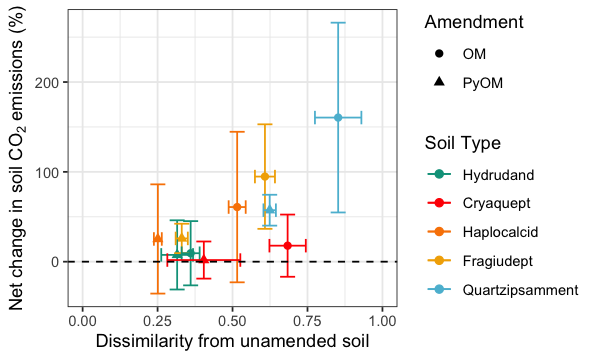

In [8]:
options(repr.plot.width=5, repr.plot.height=3)
d.plot = d %>% filter(Day=="26" & Amdmt != "Soil")%>%
    group_by(Day,Amdmt,Soil_Trtmt,Soil_Name)%>%
    summarize(DistToSoil.sd=sd(DistToSoil,na.rm=TRUE),DiffResp.C.cum.sd=sd(DiffResp.C.cum,na.rm=TRUE),
              DistToSoil.se=sd(DistToSoil,na.rm=TRUE)/sqrt(n()),DiffResp.C.cum.se=sd(DiffResp.C.cum,na.rm=TRUE)/sqrt(n()),
              DistToSoil=mean(DistToSoil),DiffResp.C.cum=mean(DiffResp.C.cum))


p = ggplot(d.plot,aes(x=DistToSoil,y=DiffResp.C.cum,fill=Soil_Name,color=Soil_Name,shape=Amdmt))
p = p + geom_point(size=2) + theme_bw()
p = p + geom_errorbar(aes(ymin=(DiffResp.C.cum-1.96*DiffResp.C.cum.se),ymax=(DiffResp.C.cum+1.96*DiffResp.C.cum.se)),
                     width=0.05)
p = p + geom_errorbarh(aes(xmin=(DistToSoil-1.96*DistToSoil.se),xmax=(DistToSoil+1.96*DistToSoil.se)),height=15)
p = p + geom_hline(yintercept = 0, linetype=2) #+ facet_wrap(~Day)
p = p + xlab("Dissimilarity from unamended soil")
#p = p + ylab(expression(atop(paste("Net change in ", CO[2]," emissions",sep=""), paste("from soil (mg ", CO[2], "-C ", g^-1,"soil C)", sep=""))))
p = p + ylab(expression(paste("Net change in soil ", CO[2]," emissions (%)",sep="")))
palette = c(wes_palette("Darjeeling1"),wes_palette("Darjeeling2")[2:4])
palette = palette[c(2,1,4,3,5,6)]
p = p + scale_fill_manual(values=palette)+ scale_color_manual(values=palette) + scale_shape_manual(values=c(16,17))
p = p + xlim(0,1)
p = p + guides(shape = guide_legend(title="Amendment"), color=guide_legend(title="Soil Type"), fill=guide_legend(title="Soil Type"))
p